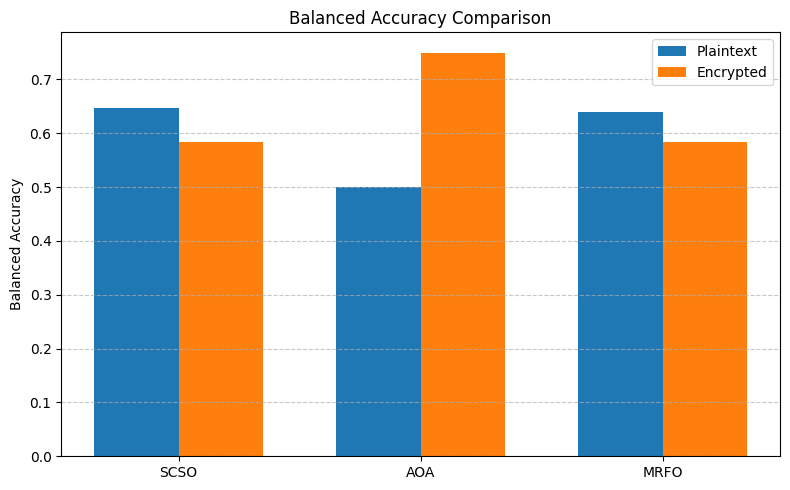

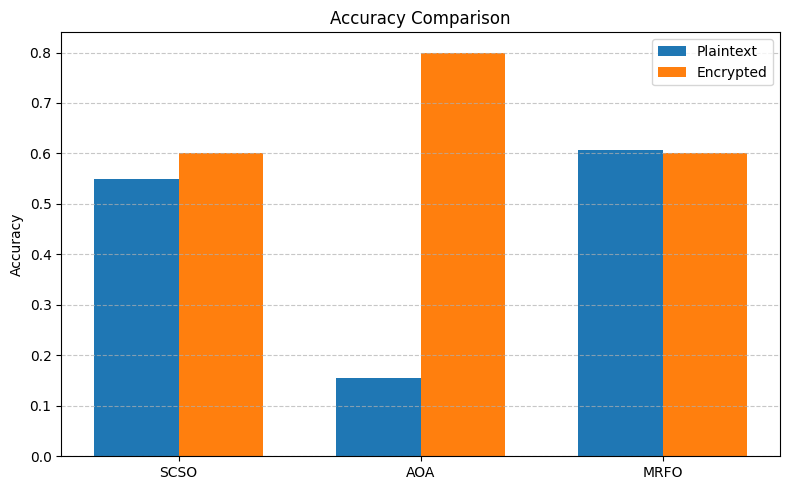

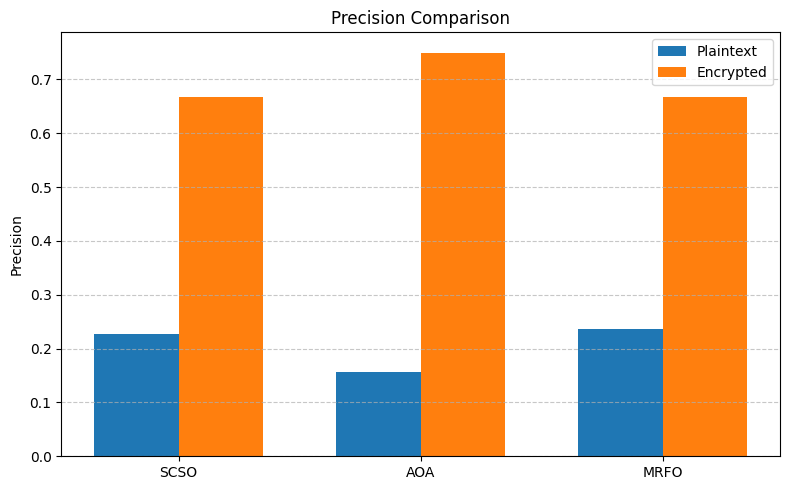

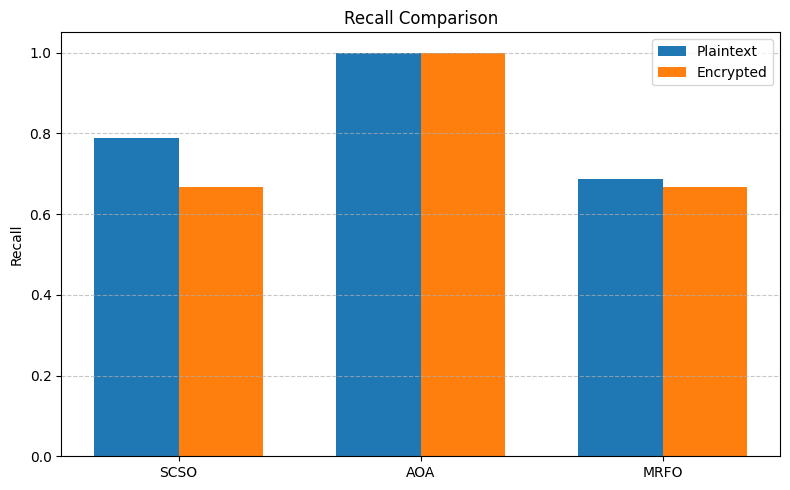

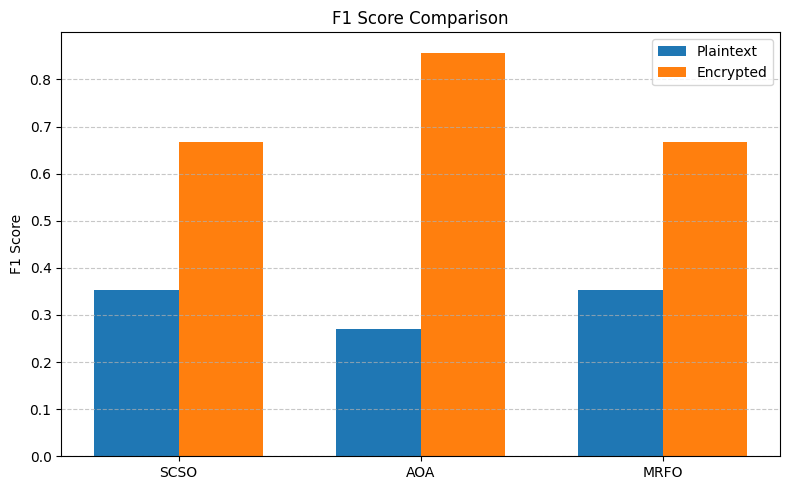

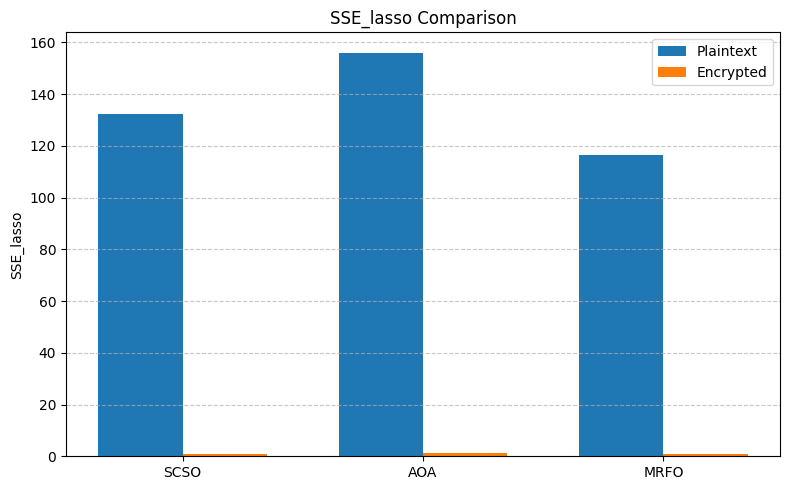

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


methods = ['SCSO', 'AOA', 'MRFO']
metrics = ['Balanced Accuracy', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'SSE_lasso']


plaintext = {
    'Balanced Accuracy': [0.6472, 0.5000, 0.6395],
    'Accuracy':          [0.5503, 0.1557, 0.6069],
    'Precision':         [0.2274, 0.1557, 0.2369],
    'Recall':            [0.7879, 1.0000, 0.6869],
    'F1 Score':          [0.3529, 0.2694, 0.3523],
    'SSE_lasso':         [132.2646, 156.1187, 116.5254]
}


encrypted = {
    'Balanced Accuracy': [0.5833, 0.7500, 0.5833],
    'Accuracy':          [0.6000, 0.8000, 0.6000],
    'Precision':         [0.6667, 0.7500, 0.6667],
    'Recall':            [0.6667, 1.0000, 0.6667],
    'F1 Score':          [0.6667, 0.8571, 0.6667],
    'SSE_lasso':         [0.8253, 1.2500, 0.9381]
}

# Plotting
x = np.arange(len(methods))
width = 0.35

for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.bar(x - width/2, plaintext[metric], width, label='Plaintext')
    plt.bar(x + width/2, encrypted[metric], width, label='Encrypted')

    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.xticks(x, methods)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


              Model  Accuracy  Precision    Recall
0     Random Forest  0.783019   0.276243  0.256410
1               KNN  0.843553   0.470588  0.164103
2               SVM  0.850629   0.631579  0.061538
3  SCSO (Plaintext)  0.550300   0.227400  0.787900
4   AOA (Plaintext)  0.155700   0.155700  1.000000
5  MRFO (Plaintext)  0.606900   0.236900  0.686900
6  SCSO (Encrypted)  0.600000   0.666700  0.666700
7   AOA (Encrypted)  0.800000   0.750000  1.000000
8  MRFO (Encrypted)  0.600000   0.666700  0.666700


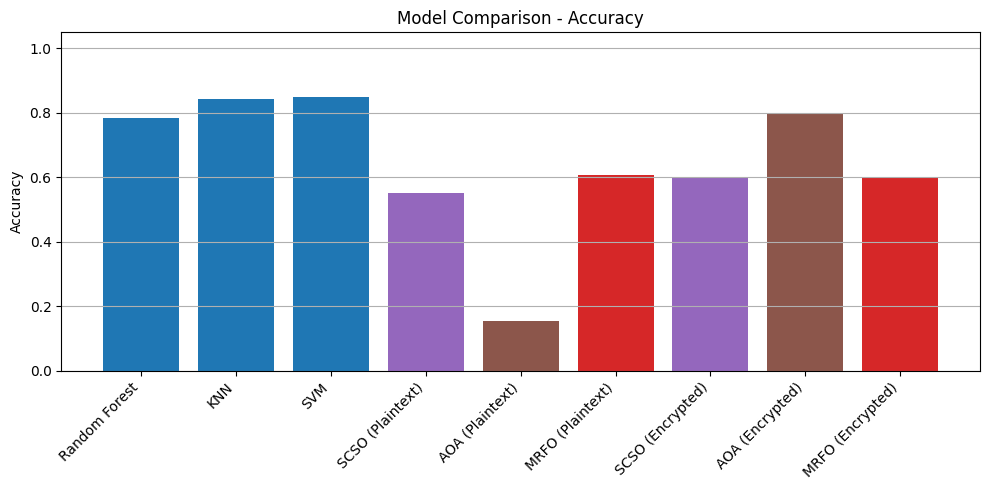

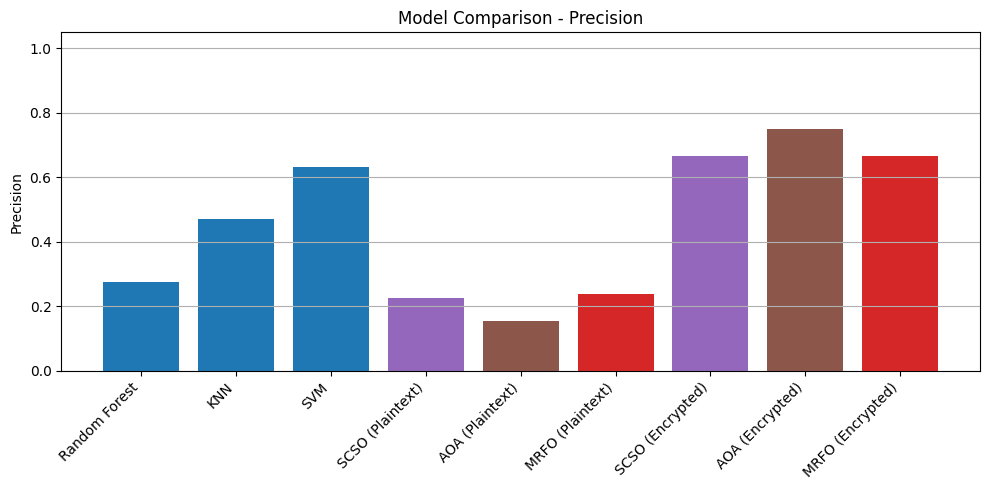

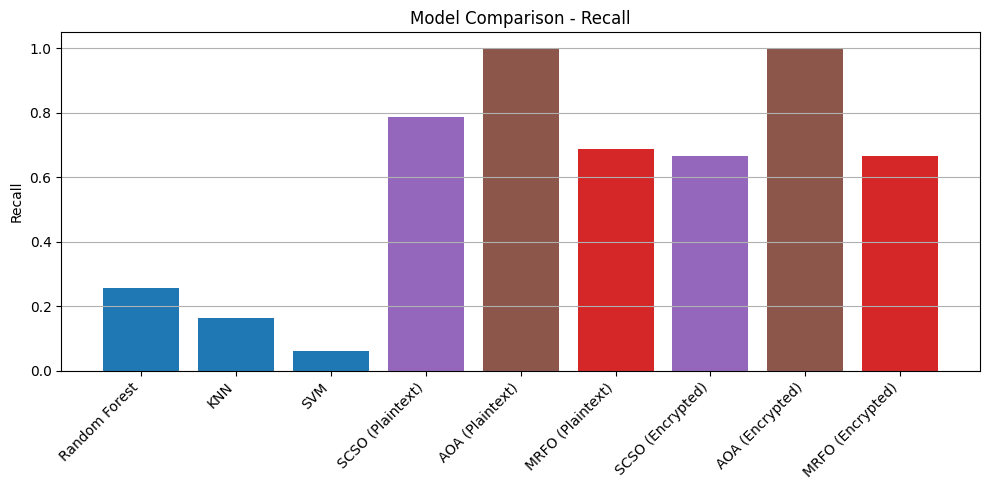

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Post_LDA_dataset.csv')
X = df.drop(columns=["target"])
y = df['target'].values
X_lda = X.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classifiers
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf')
}

results = []

# Evaluate ML models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec
    })


custom_models = [
    ('SCSO (Plaintext)', 0.5503, 0.2274, 0.7879),
    ('AOA (Plaintext)',  0.1557, 0.1557, 1.0000),
    ('MRFO (Plaintext)', 0.6069, 0.2369, 0.6869),
    ('SCSO (Encrypted)',   0.6000, 0.6667, 0.6667),
    ('AOA (Encrypted)',    0.8000, 0.7500, 1.0000),
    ('MRFO (Encrypted)',   0.6000, 0.6667, 0.6667),
]

for name, acc, prec, rec in custom_models:
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec
    })


df_results = pd.DataFrame(results)
print(df_results)


metrics = ['Accuracy', 'Precision', 'Recall']
colors = ['#1f77b4', '#1f77b4', '#1f77b4', '#9467bd', '#8c564b', '#d62728', '#9467bd', '#8c564b', '#d62728']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar(df_results['Model'], df_results[metric], color=colors[:len(df_results)])
    plt.title(f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.grid(True, axis='y')
    plt.show()
